# Overview

This project analyzes business fundamental data of many companies during one year of operation in order to predict which of those companies later on went bankrupt. An ensemble model is created out of logistic regression and random forest models in order to perform these predictions. As a product of the project, a model is produced that financial groups could use in order to assess risk of investment in a given company, based on whether or not it was predicted that company would go bankrupt.

# Business Problem

As much of corporate financial investment revolves around the accurate prediction of a company's performance, any sort of tool used to assess a company's future state is incredibly useful. As such, the data science team set out to create a tool that would predict an extreme case in a company's future, its bankrupty. With dependable information about a company's impending bankruptcy, investors could either know to avoid bullish positions or to, conversely, take bearish positions in that company. What is more, with dependable bankruptcy forecasting, financial institutions could better evaluate and target the future acquisition of certain companies, if it were desired to do so after those companies' bankruptcies.

# Data Understanding

To achieve analysis, the team uses data on Polish companies operating between 2007 and 2013. This data was obtained via the University of California at Irvine's machine learning repository. Its ultimate source is the Emerging Markets Information Service.

The team uses data on only one year of operation (2010), as it had the highest number of data points (10,503 instances) and companies surveyed. For each company in this set, financial fundamental numbers are listed (e.g. debts-to-assets ration, EBITDA, etc.), as well as a variable that indicates whether or not that company went bankrupt three years later. As ulitimate bankruptcy is the target variable for this analysis, the model fit to this data then will effectively predict if a company, based on its financial fundamentals, will go bankrupt in three years.

# Data Preparation, Exploratory Data Analysis (EDA), and Feature Engineering

Data is first imported from its .csv file as a dataframe.

In [2]:
# Import relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
    
# Import data set as a dataframe

df=pd.read_csv('csv_result-3year.csv')

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data is then cleaned in order to eliminate all null or missing values and format as number variables in order to be more easily manipulated. Rows with missing values were simply removed, as there were enough data points to still perform analysis without having to impute those missing values. Dataframe columns were then renamed for readability's sake.

In [24]:
# Rows with null values are removed from the dataset 

df.dropna(inplace=True)

# Rows with '?' as values were removed from the dataset

for col in list(df.columns):
    df=df[df[col]!='?']

# Format all dataframe values as numbers
    
df=df.apply(pd.to_numeric)

# Rename columns for readibility

df.rename(columns = {'Attr1': 'return_on_assets',
                     'Attr2': 'debt_to_assets', 
                     'Attr3': 'working_capital_to_assets',
                     'Attr4': 'current_ratio',
                     'Attr5': '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
                     'Attr6': 'retained_earnings_to_assets',
                     'Attr7': 'EBIT_to_assets',
                     'Attr8': 'book_value_equity_to_assets',
                     'Attr9': 'asset_turnover',
                     'Attr10': 'equity_to_assets',
                     'Attr11': '(gross profit + extraordinary items + financial expenses) / total assets',
                     'Attr12': 'gross_profit_to_current_debt',
                     'Attr13': '(gross profit + depreciation) / sales',
                     'Attr14': '(gross profit + interest) / total assets',
                     'Attr15': '(total liabilities * 365) / (gross profit + depreciation)',
                     'Attr16': '(gross profit + depreciation) / total liabilities',
                     'Attr17': 'asset_to_debt',
                     'Attr18': 'gross_profitability',
                     'Attr19': 'gross_profit_margin',
                     'Attr20': 'days_sales_in_inventory',
                     'Attr21': 'y/y_sales',
                     'Atrr22': 'operating_roa',
                     'Attr23': 'net_profit_ratio',
                     'Attr24': '3_yr_gross_profitability',
                     'Attr25': '(equity - share capital) / total assets',
                     'Attr26': '(net profit + depreciation) / total liabilities',
                     'Attr27': 'operating_margin',
                     'Attr28': 'working_capital_to_fixed_assets',
                     'Attr29': 'log_assets',
                     'Attr30': 'net_debt_to_sales',
                     'Attr31': 'EBT_to_sales', # check
                     'Attr32': 'average_payment_period',
                     'Attr33': 'operating_costs_to_current_debt',
                     'Attr34': 'operating_costs_to_total_debt',
                     'Attr35': 'net_asset_turnover',
                     'Attr36': 'total sales / total assets',
                     'Attr37': 'long_term_quick_ratio',
                     'Attr38': 'constant_capital_to_total_assets',
                     'Attr39': 'net_profit_margin',
                     'Attr40': '(current assets - inventory - receivables) / short-term liabilities',
                     'Attr41': 'months_debt_to_profit',
                     'Attr42': 'EBITDA_sales',
                     'Attr43': 'rotation_receivables_plus_inventory_turnover',
                     'Attr44': 'days_receivables_to_sales',
                     'Attr45': 'net_inventory_turnover',
                     'Attr46': 'short_term_quick_ratio',
                     'Attr47': 'days_inventory_to_cogs',
                     'Attr48': 'EBITDA_rota',
                     'Attr49': 'EBITDA_margin',
                     'Attr50': 'current_assets_to_total_debt',
                     'Attr51': 'current_debt_to_total_assets',
                     'Attr52': 'days_debt_to_cogs',
                     'Attr53': 'equity_to_fixed_assets',
                     'Attr54': 'constant_capital_to_fixed_assets',
                     'Attr55': 'working_capital',
                     'Attr56': 'contribution_margin', 
                     'Attr57': 'total costs /total sales',
                     'Attr58': 'operating_ratio',
                     'Attr59': 'long_term_debt_to_equity',
                     'Attr60': 'inventory_turnover',
                     'Attr61': 'receivables_turnover',
                     'Attr62': 'days_short_term_debt_to_sales',
                     'Attr63': 'sales_to_short_term_debt',
                     'Attr64': 'fixed_asset_turnover'
                    }, inplace=True)

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Next, all data is graphed against an arbitrary independent variable in order to just visually inspect the distribution of data to find anomalies or outliers of any feature.

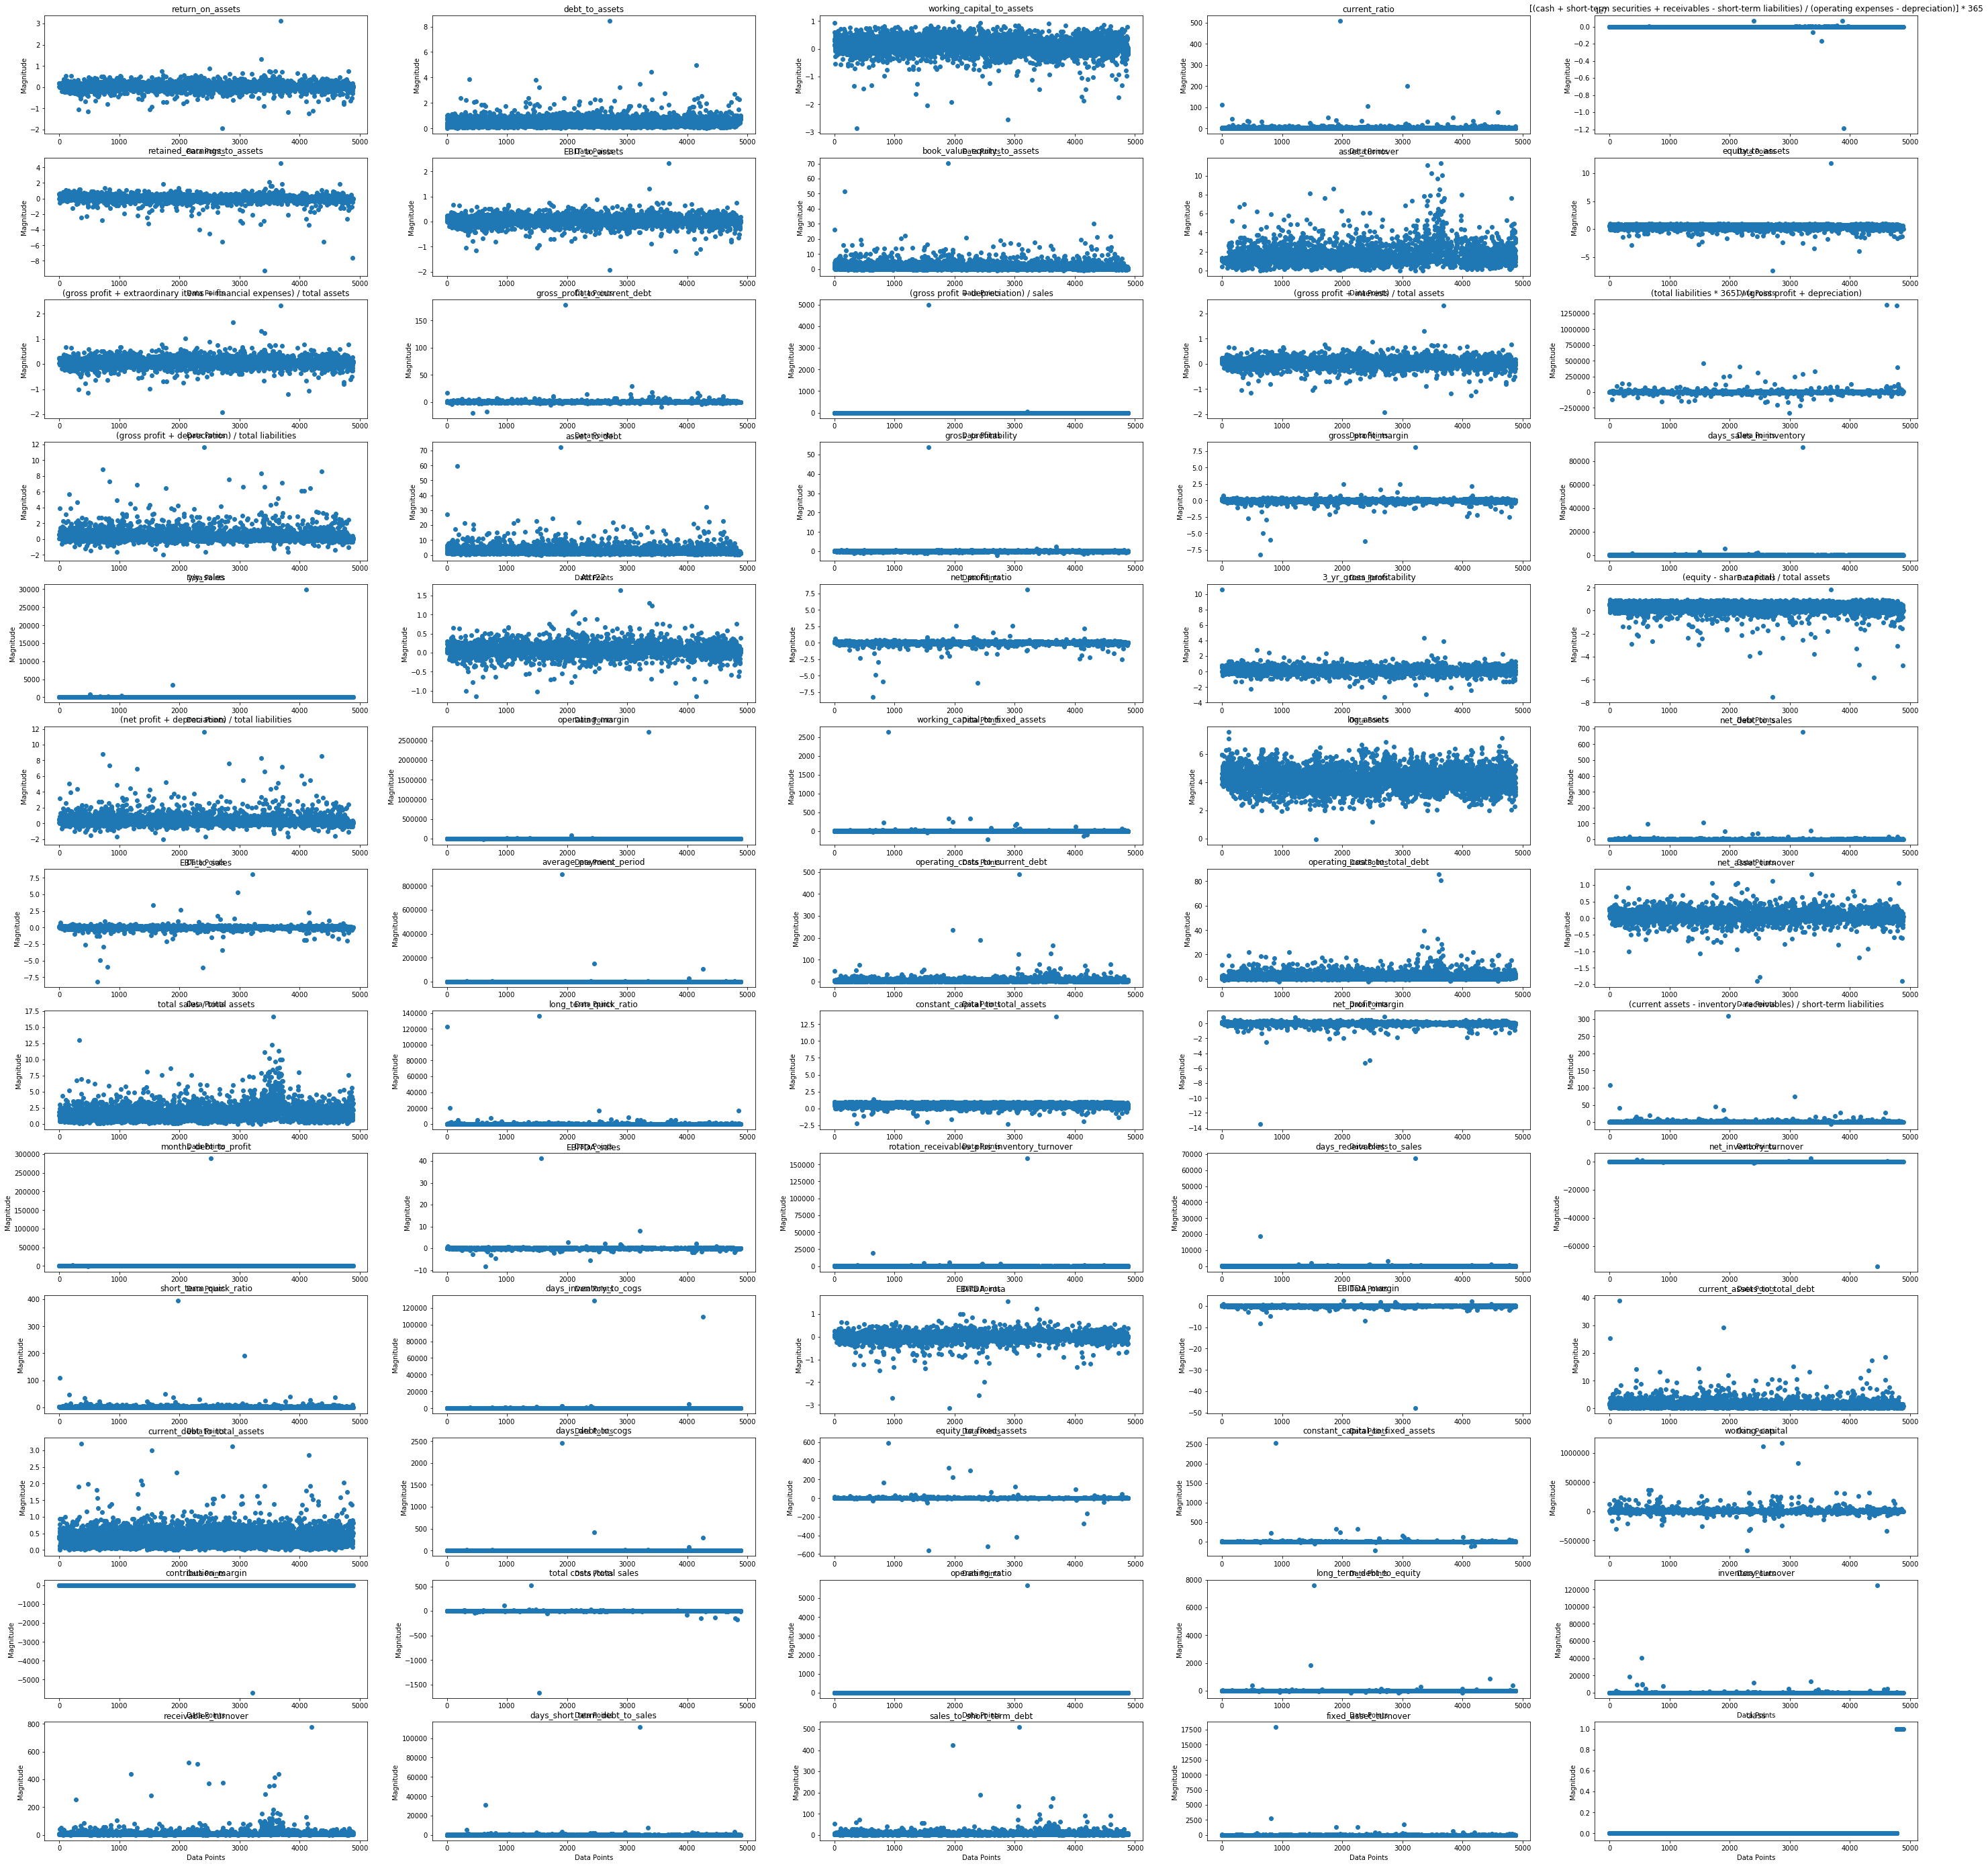

In [25]:
# Define arbitrary x variable as the length of the data set

x=list(range(0,len(df.id)))

# Initiate subpot figure with a plot for each examined feature

figure, ax = plt.subplots(13, 5, figsize=(50, 50))
cols= list(df.columns)
cols.pop(0)
major=list(range(0, 13))
minor=list(range(0, 5))

# Name and label each graph, and plot data

for row in major:
    for col in minor:
        index=(row)*5+col
        ax[row][col].set_title(cols[index])
        ax[row][col].set_xlabel('Data Points')
        ax[row][col].set_ylabel('Magnitude')
        ax[row][col].scatter(x, list(df[cols[index]]))


Looking at each graph, it appears that here and there, each feature has a handful of values that are far greater than the rest of the set. However, because the proportion of these points is incredibly small when compared to the overall number of data points in the set, the data science team elects to keep the data points as are for the analysis. If overall evaluation metrics for the set's model are not sufficient, the data team will keep in mind that maybe the first step to improving the model would be to remove some of these outliers.

Next, the data team graphs each feature of the set against the target variable to get an initial sense of where strong correlations lie between the set's features and whether or not the company later on went bankrupt.

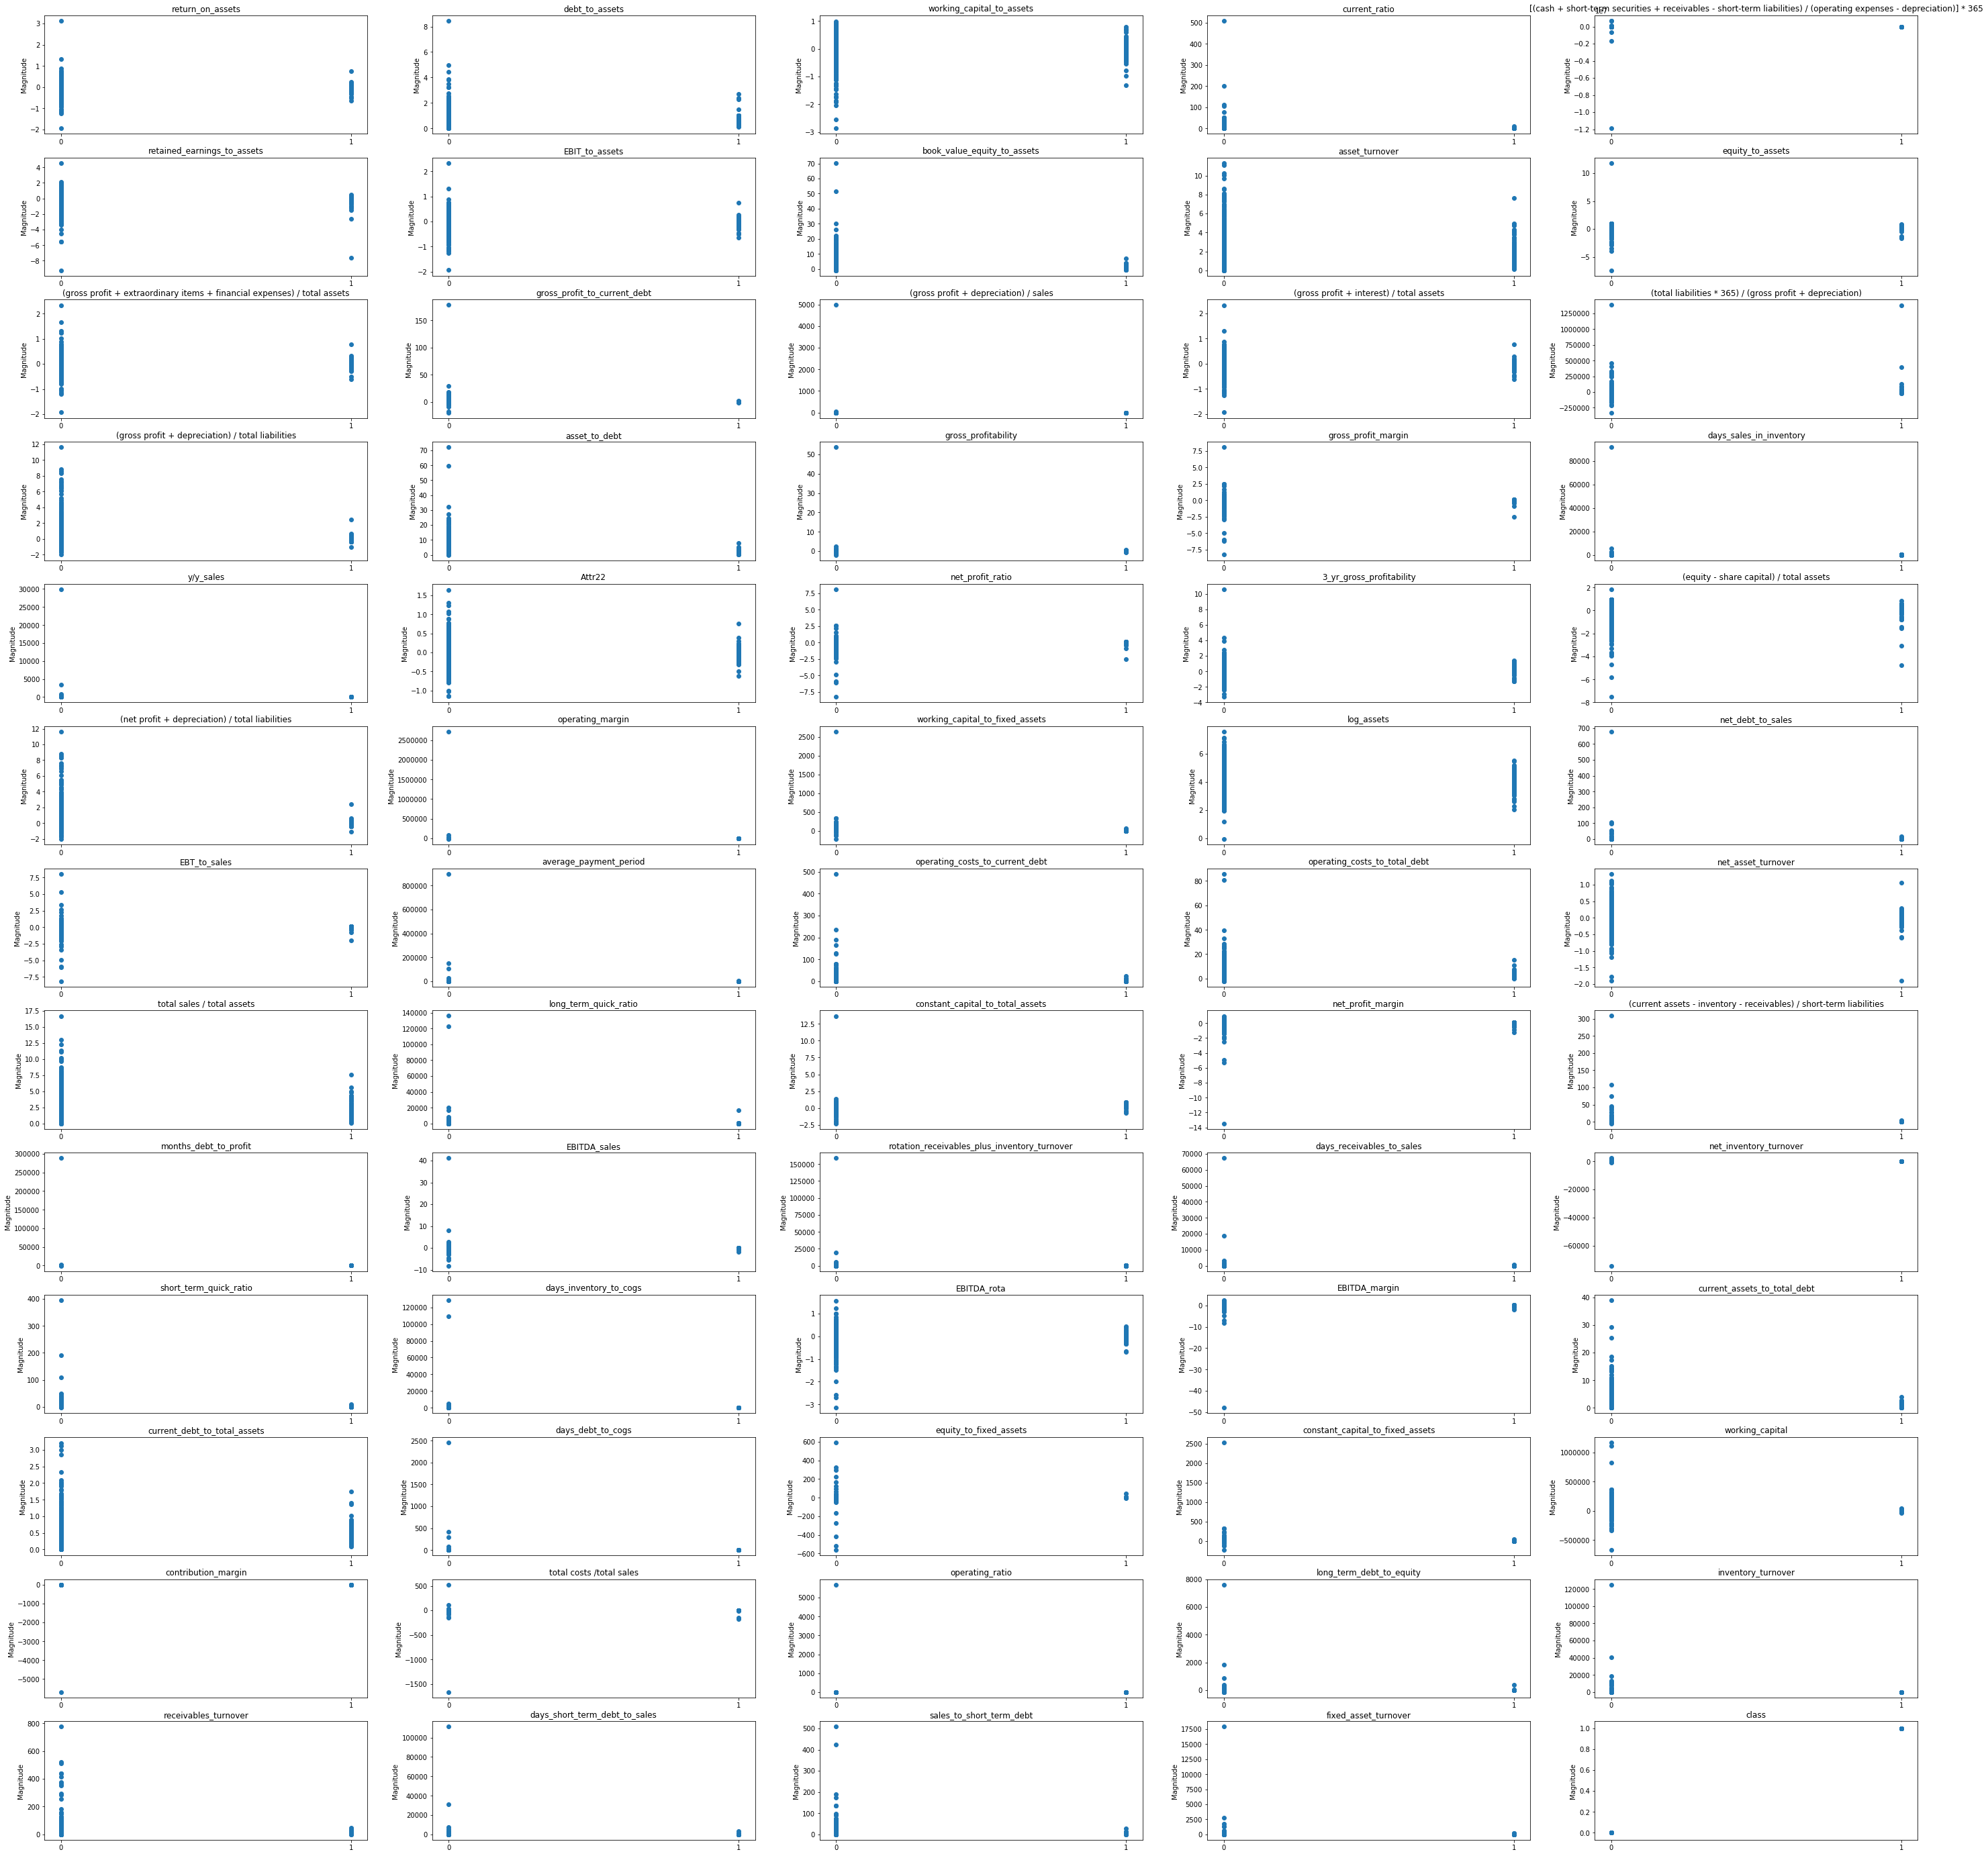

In [26]:
# Define arbitrary x variable as the length of the data set

x=list(range(0,len(df.id)))

# Initiate subpot figure with a plot for each examined feature

figure, ax = plt.subplots(13, 5, figsize=(50, 50))
cols= list(df.columns)
cols.pop(0)
major=list(range(0, 13))
minor=list(range(0, 5))

# Name and label each graph, and plot data

for row in major:
    for col in minor:
        index=(row)*5+col
        ax[row][col].set_title(cols[index])
        #ax[row][col].set_xlabel('Data Points')
        ax[row][col].set_ylabel('Magnitude')
        ax[row][col].scatter(df['class'], list(df[cols[index]]))
        ax[row][col].set_xticks([0, 1])
        

A correlation matrix for the entire dataframe is produced to supplement the graphs of features against the target above. With both of these bits of information, the data science team can identify features that will likely be most important for development of the model. In general, tight groupings of positive bankrupt data points in the graphs above indicate higher influence of the feature on the target. This influence can then be corroborated by high values on the correlation matrix below.

In [27]:
# Make all rows and columns of correlation matrix visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Create correlation matrix, and sequence according to greatest correlation absolute value
corrs=df.corr()
corrs=corrs.apply(lambda x: abs(x))
corrs.sort_values(by=['class'], ascending=False)

,id,return_on_assets,debt_to_assets,working_capital_to_assets,current_ratio,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained_earnings_to_assets,EBIT_to_assets,book_value_equity_to_assets,asset_turnover,equity_to_assets,(gross profit + extraordinary items + financial expenses) / total assets,gross_profit_to_current_debt,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,asset_to_debt,gross_profitability,gross_profit_margin,days_sales_in_inventory,y/y_sales,Attr22,net_profit_ratio,3_yr_gross_profitability,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,operating_margin,working_capital_to_fixed_assets,log_assets,net_debt_to_sales,EBT_to_sales,average_payment_period,operating_costs_to_current_debt,operating_costs_to_total_debt,net_asset_turnover,total sales / total assets,long_term_quick_ratio,constant_capital_to_total_assets,net_profit_margin,(current assets - inventory - receivables) / short-term liabilities,months_debt_to_profit,EBITDA_sales,rotation_receivables_plus_inventory_turnover,days_receivables_to_sales,net_inventory_turnover,short_term_quick_ratio,days_inventory_to_cogs,EBITDA_rota,EBITDA_margin,current_assets_to_total_debt,current_debt_to_total_assets,days_debt_to_cogs,equity_to_fixed_assets,constant_capital_to_fixed_assets,working_capital,contribution_margin,total costs /total sales,operating_ratio,long_term_debt_to_equity,inventory_turnover,receivables_turnover,days_short_term_debt_to_sales,sales_to_short_term_debt,fixed_asset_turnover,class
class,0.248492,0.058435,0.080942,0.054505,0.015788,0.002236,0.080439,0.060393,0.052561,0.069774,0.065548,0.047881,0.019925,0.002366,0.060415,0.087065,0.067855,0.054061,0.014192,0.036669,0.002005,0.002504,0.058017,0.033845,0.037652,0.108345,0.067217,0.002226,0.001099,0.047720,0.000357,0.029006,0.001982,0.023707,0.038991,0.076142,0.029666,0.004524,0.072470,0.036123,0.010834,0.002169,0.016100,0.001802,0.001493,0.001741,0.016708,0.003314,0.023647,0.004931,0.042385,0.088557,0.002485,0.000727,0.001072,0.016395,0.002151,0.017096,0.002157,0.002278,0.004438,0.011771,0.001531,0.027075,0.000729,1.000000
id,1.000000,0.009473,0.058529,0.090873,0.019293,0.015334,0.065511,0.015468,0.060273,0.089307,0.047436,0.003832,0.001146,0.009121,0.015556,0.035021,0.040193,0.061304,0.012079,0.004982,0.005921,0.014244,0.005251,0.009106,0.059152,0.067859,0.036943,0.009906,0.020114,0.043598,0.004139,0.005218,0.002511,0.042974,0.065492,0.020531,0.140896,0.026317,0.053806,0.008993,0.018163,0.001710,0.003644,0.002958,0.000992,0.020189,0.021917,0.010400,0.026022,0.002745,0.065985,0.070053,0.002572,0.020112,0.020308,0.019101,0.008722,0.002908,0.008774,0.009307,0.006973,0.060735,0.002484,0.033985,0.015933,0.248492
(equity - share capital) / total assets,0.067859,0.434729,0.816450,0.511208,0.084125,0.002684,0.722194,0.442089,0.380912,0.120482,0.753716,0.359963,0.109499,0.010664,0.441991,0.021353,0.322351,0.374890,0.077099,0.281822,0.013705,0.004634,0.308866,0.275964,0.478606,1.000000,0.309718,0.012694,0.013632,0.266673,0.055644,0.275579,0.024156,0.131057,0.039901,0.320396,0.059601,0.019065,0.485190,0.227061,0.065641,0.008088,0.080026,0.020358,0.028597,0.007084,0.075422,0.013891,0.258700,0.095145,0.344862,0.561585,0.023606,0.127413,0.016309,0.135513,0.010996,0.016260,0.010969,0.018329,0.026138,0.021112,0.056160,0.136109,0.020326,0.108345
current_debt_to_total_assets,0.070053,0.301755,0.698566,0.681470,0.157113,0.015058,0.321124,0.309144,0.436175,0.213641,0.607751,0.252479,0.125936,0.001641,0.309130,0.046813,0.327182,0.434054,0.059474,0.180943,0.000766,0.006557,0.227982,0.173911,0.320757,0.561585,0.318276,0.019622,0.001116,0.139125,0.021481,0.182183,0.032300,0.238928,0.125629,0.237647,0.269005,0.005153,0.750543,0.162133,0.107147,0.005463,0.061691,0.008886,0.021321,0.0010

By both comparing graphs of features against target and the correlation matrix, features '(equity - share capital) / total assets', 'current_debt_to_total_assets', and '(total liabilities * 365) / (gross profit + depreciation)' seem to be most influential in terms of determining whether or not a company goes bankrupt in 3 years' time. To weight these features more heavily, new columns are made in the dataframe. These three new columns are the square product of each one of those influential features, respectively, to more heavily weight their effect on the target variable.

In [33]:
# Create new features of the squares of the top three most influential features to weight more heavily

df['(equity - share capital) / total assets SQUARE']=df['(equity - share capital) / total assets'].map(lambda x: x**2)
df['current_debt_to_total_assets SQUARE']=df['current_debt_to_total_assets'].map(lambda x: x**2)
df['(total liabilities * 365) / (gross profit + depreciation) SQUARE']=df['(total liabilities * 365) / (gross profit + depreciation)'].map(lambda x: x**2)


# Model Fitting and Interpretation

With the prepped data set, the data science team proceeds to create models that represent the data. The team first splits the data into training and testing sets in order to prevent overfitting of the models to the data. The team then creates models of many different types (KNN, Logistic Regression, Decision Tree, and Random Forest) in order to see which variety of model best fits to the data. After evaluating each model type on its own, the team combines these models into an ensemble to ultimately maximize integrity of the overall model. Since the percentage of bankruptcies is very low in the data set and since both false negatives and false positives are potentially harmful and costly in the context of taking bullish or bearish positions on a company, the team uses F1-score as the main metric by which the quality of models is evaluated. The team uses precision as a secondary metric, just because in general, it would probably be more harmful to make extreme financial decisions about a company that is expected to go bankrupt when, in reality, it doesn't. Accuracy is also used by the team to judge models, but mainly just as a reference.

## Train-test Split

As mentioned, the data is first split into train and test sets to prevent model overfitting. This split is done below and used for all developed models.

In [35]:
# Establish features and target in data

X=df.drop(['class'], axis=1)
y=df['class']

# Split features and target into training and testing partitions

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale feature set according to standard distribution to make results more interpretable
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## KNN Model

A simple KNN model is first produced. GridSearchCV is used in order to tune for optimal hyperparameters. Those parameters are then used in the model, and a corresponding F-1 score is produced. Precision is used as a secondary metric by which to gauge the model. Accuracy is used as a tertiary gauge of the model, although it is not focused upon, as the data set's class imbalance confounds the meaning of that metric.

In [ ]:
# KNN parameters are set up to be evaluated

param_grid = { 
    'n_neighbors': list(range(1,50)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

# Grid search is executed with F1 as scoring method

grid_knn=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# KNN model is fit to data set and optimal parameters are found

grid_knn.fit(X_train, y_train)
grid_knn.best_params_

The resultant parameters are then used in a KNN model, which is fit to training data and then measured against the test set.

In [48]:
# Establish KNN model

knn=KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')

# Fit KNN model to training data

knn.fit(X_train, y_train)

# Make predictions on test set with model

knn_preds = knn.predict(X_test)

# Evaluate KNN model based on F1-score, and display accuracy just for reference

knn_f1 = metrics.f1_score(y_test, knn_preds)
knn_acc = metrics.accuracy_score(y_test, knn_preds)
knn_pre = metrics.precision_score(y_test, knn_preds)

print(knn_f1, knn_acc, knn_pre)

0.14285714285714285 0.9705400981996727 0.2


As can be seen, the model has an F-1 score of ~0.14, which is not great. The precision is 0.2, which is also not great. Accuracy is above 0.97, which is good, but this is likely due to the class imbalance of the target in the set.

## Logistic Regression Model

A logistic regression model is next produced. GridSearchCV is used in order to tune for optimal hyperparameters. Those parameters are then used in the model, and a corresponding F-1 score is produced. Precision is used as a secondary metric by which to gauge the model. Accuracy is used as a tertiary gauge of the model, although it is not focused upon, as the data set's class imbalance confounds the meaning of that metric.

In [ ]:
# Logistic regression parameters are set up to be evaluated

param_grid = { 
    'C': list(range(1,25)),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
    }

# Grid search is executed with F1 as scoring method

grid_lr=GridSearchCV(LogisticRegression(random_state=1), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Logistic regression model is fit to data set and optimal parameters are found

grid_lr.fit(X_train, y_train)

grid_lr.best_params_

The resultant parameters are then used in a logistic regression model, which is fit to training data and then measured against the test set.

In [49]:
# Establish logistic regression model

lr = LogisticRegression(class_weight=None, C=22, penalty='l1', random_state=1)

# Fit logistic regression model to training data

lr.fit(X_train, y_train)

# Make predictions on test set with model

lr_preds = lr.predict(X_test)

# Evaluate logistic regression model based on F1-score, and display accuracy just for reference

lr_f1 = metrics.f1_score(y_test, lr_preds)
lr_acc = metrics.accuracy_score(y_test, lr_preds)
lr_pre = metrics.precision_score(y_test, lr_preds)

print(lr_f1, lr_acc, lr_pre)

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8928571428571429 0.9950900163666121 0.8620689655172413


As can be seen, the model has an F-1 score of ~0.89, which is pretty high, indicating high integrity of the model. Precision is ~0.86, which is also high and indicates low likelihood of predicting false positives. Accuracy is above 0.99, which is good, but this is likely due to the class imbalance of the target in the set.

## Decision Tree Model

A decision tree model is next produced. GridSearchCV is used in order to tune for optimal hyperparameters. Those parameters are then used in the model, and a corresponding F-1 score is produced. Precision is used as a secondary metric by which to gauge the model. Accuracy is used as a tertiary gauge of the model, although it is not focused upon, as the data set's class imbalance confounds the meaning of that metric.

In [ ]:
# Decision tree parameters are set up to be evaluated

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,20)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'min_weight_fraction_leaf': [0, 0.25, 0.5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_impurity_decrease': [0, 0.4, 0.8],
    'min_impurity_split': [0, 0.4, 0.8]
    }

# Grid search is executed with F1 as scoring method

grid_dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=1), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Decision tree model is fit to data set and optimal parameters are found

grid_dt.fit(X_train, y_train)

grid_dt.best_params_

The resultant parameters are then used in a decision tree model, which is fit to training data and then measured against the test set.

In [50]:
# Establish decision tree model

dtc = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 18,
 max_features= 'log2',
 min_impurity_decrease= 0,
 min_impurity_split= 0,
 min_samples_leaf= 2,
 min_samples_split= 5,
 min_weight_fraction_leaf= 0,
 random_state=1,
 class_weight='balanced')

# Fit decision tree model to training data

dtc.fit(X_train, y_train)

# Make predictions on test set with model

dtc_preds  = dtc.predict(X_test)

# Evaluate decision tree model based on F1-score, and display accuracy just for reference

dtc_f1 = metrics.f1_score(y_test, dtc_preds)
dtc_acc = metrics.accuracy_score(y_test, dtc_preds)
dtc_pre = metrics.precision_score(y_test, dtc_preds)

print(dtc_f1, dtc_acc, dtc_pre)

0.9019607843137256 0.9959083469721768 0.9583333333333334


/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


As can be seen, the model has an F-1 score of ~0.9, which is pretty high, indicating high integrity of the model. Precision is ~0.96, which is also high and indicates low likelihood of predicting false positives. Accuracy is above 0.99, which is good, but this is likely due to the class imbalance of the target in the set.

## Random Forest Model

A random forest model is next produced. GridSearchCV is used in order to tune for optimal hyperparameters. Those parameters are then used in the model, and a corresponding F-1 score is produced. Precision is used as a secondary metric by which to gauge the model. Accuracy is used as a tertiary gauge of the model, although it is not focused upon, as the data set's class imbalance confounds the meaning of that metric.

In [ ]:
# Random forest parameters are set up to be evaluated

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,20)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'min_weight_fraction_leaf': [0, 0.25, 0.5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_impurity_decrease': [0, 0.4, 0.8],
    'min_impurity_split': [0, 0.4, 0.8],
    'bootstrap': [True, False]
    }

# Grid search is executed with F1 as scoring method

grid_tree=GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Decision tree model is fit to data set and optimal parameters are found

grid_tree.fit(X_train, y_train)
grid_tree.best_params_

The resultant parameters are then used in a random forrest model, which is fit to training data and then measured against the test set.

In [51]:
# Establish random forest model

rfc = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                                              criterion='gini', max_depth=11,
                                              max_features='auto',
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=0,
                                              min_samples_leaf=2,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              random_state=1)

# Fit random forest model to training data

rfc.fit(X_train, y_train)

# Make predictions on test set with model

rfc_preds  = rfc.predict(X_test)

# Evaluate decision tree model based on F1-score and precision, and display accuracy just for reference

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)
rfc_pre = metrics.precision_score(y_test, rfc_preds)

print(rfc_f1, rfc_acc, rfc_pre)

0.8260869565217391 0.9934533551554828 1.0


/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/

As can be seen, the model has an F-1 score of ~0.83, which is pretty high, indicating high integrity of the model. Precision is 1.0, which means no false positives were predicted at all. Accuracy is above 0.99, which is good, but this is likely due to the class imbalance of the target in the set.

## Combination into Ensemble Model

The different models are then combined into ensembles to see which combinations yield the highest F-1 score, when gauged against the test set. Since the reliability of the KNN model was very low, that model is excluded from this analysis. Every possible combination of the logistic regression, decision tree, and random forest model was weighed against one another to find the one with the highest integrity.

In [47]:
# Create ensemble models for each combination of the accepted three models

voting_clf1 = VotingClassifier(
                estimators=[('logreg', lr), ('decisiontree', dtc), ('randomforest', rfc)], 
                voting='soft')

voting_clf2 = VotingClassifier(
                estimators=[('logreg', lr), ('decisiontree', dtc)], 
                voting='soft')

voting_clf3 = VotingClassifier(
                estimators=[('logreg', lr), ('randomforest', rfc)], 
                voting='soft')

voting_clf4 = VotingClassifier(
                estimators=[('decisiontree', dtc), ('randomforest', rfc)], 
                voting='soft')

# Fit each model to the training data

voting_clf1.fit(X_train, y_train)
voting_clf2.fit(X_train, y_train)
voting_clf3.fit(X_train, y_train)
voting_clf4.fit(X_train, y_train)

# Create bankruptcy predictions with each model

vc_preds1 = voting_clf1.predict(X_test)
vc_preds2 = voting_clf2.predict(X_test)
vc_preds3 = voting_clf3.predict(X_test)
vc_preds4 = voting_clf4.predict(X_test)

# Evaluate each model based on F1-score, and display accuracy just for reference

vc_f1_1 = metrics.f1_score(y_test, vc_preds1)
vc_acc_1 = metrics.accuracy_score(y_test, vc_preds1)
vc_pre_1 = metrics.precision_score(y_test, vc_preds1)

vc_f1_2 = metrics.f1_score(y_test, vc_preds2)
vc_acc_2 = metrics.accuracy_score(y_test, vc_preds2)
vc_pre_2 = metrics.precision_score(y_test, vc_preds2)

vc_f1_3 = metrics.f1_score(y_test, vc_preds3)
vc_acc_3 = metrics.accuracy_score(y_test, vc_preds3)
vc_pre_3 = metrics.precision_score(y_test, vc_preds3)

vc_f1_4 = metrics.f1_score(y_test, vc_preds4)
vc_acc_4 = metrics.accuracy_score(y_test, vc_preds4)
vc_pre_4 = metrics.precision_score(y_test, vc_preds4)

print(vc_f1_1, vc_acc_1, vc_pre_1)
print(vc_f1_2, vc_acc_2, vc_pre_2)
print(vc_f1_3, vc_acc_3, vc_pre_3)
print(vc_f1_4, vc_acc_4, vc_pre_4)

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tre

0.9411764705882353 0.997545008183306 1.0
0.8979591836734693 0.9959083469721768 1.0
0.9433962264150944 0.997545008183306 0.9615384615384616
0.92 0.9967266775777414 1.0


/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationW

As can be seen, the highest F-1 score was produced by the ensemble of the logistic regression and random forest models. This score was over 0.94, which indicates very high integrity of the model. Second highest F-1 score was produced by the ensemble of all models, which was also above 0.94. In terms of precision, though, the ensemble of all models performs better than the combination of the logistic regression and random forest. Accuracy is high for all models. Overall, then, the team deems the ensemble of all logistic regression, decision tree, and random forest models as being the best model, as it maximizes both the F-1 score and precision.

## Resulting Feature Analysis

With a high-integrity model having been created, the team then analyzes which features were most influential for each model. This info gives consumers of the model a general gauge of important metrics to look into when evaluating whether or not a company is expected to go bankrupt.

The first model evaluated is the linear regression model.

In [141]:
# Find most important features in random forest model

lr_importances_orig=list(lr.coef_[0])
lr_importances=list(lr.coef_[0])
lr_importances=[abs(ele) for ele in lr_importances]


# Sort the list

index=list(range(0, len(lr_importances)))
lr_importances.sort()

# Find indeces and names of features with highest magnitude influence

imp1=lr_importances[-2]
imp2=lr_importances[-3]
imp3=lr_importances[-4]

ind1=None
ind2=None
ind3=None

for num in index:
    if lr_importances_orig[num]==imp1 or lr_importances_orig[num]==-1*imp1:
        ind1=num
    if lr_importances_orig[num]==imp2 or lr_importances_orig[num]==-1*imp2:
        ind2=num
    if lr_importances_orig[num]==imp3 or lr_importances_orig[num]==-1*imp3:
        ind3=num

# Display most influential features        

print(df.columns[ind1])
print(df.columns[ind2])
print(df.columns[ind3])

(gross profit + depreciation) / total liabilities
book_value_equity_to_assets
current_assets_to_total_debt


As can be gleaned from results of the analysis, the top three most impactful features for the logistic regression model were, in order, '(gross profit + depreciation) / total liabilities', 'book_value_equity_to_assets', and 'current_assets_to_total_debt'.

Features of the decision tree model are then examined to find which features are most influential for this model.

In [142]:
# Find most important features in decision tree model

dtc_importances_orig=list(dtc.feature_importances_) 
dtc_importances=list(dtc.feature_importances_)
dtc_importances=[abs(ele) for ele in dtc_importances]


# Sort the list

index=list(range(0, len(dtc_importances)))
dtc_importances.sort()

# Find indeces and names of features with highest magnitude influence

imp1=dtc_importances[-2]
imp2=dtc_importances[-3]
imp3=dtc_importances[-4]

ind1=None
ind2=None
ind3=None

for num in index:
    if dtc_importances_orig[num]==imp1:
        ind1=num
    if dtc_importances_orig[num]==imp2:
        ind2=num
    if dtc_importances_orig[num]==imp3:
        ind3=num

# Display most influential features        

print(df.columns[ind1])
print(df.columns[ind2])
print(df.columns[ind3])

operating_costs_to_total_debt
current_debt_to_total_assets SQUARE
(gross profit + depreciation) / total liabilities


As can be gleaned from results of the analysis, the top three most impactful features for the decision tree model were, in order, 'operating_costs_to_total_debt', 'current_debt_to_total_assets SQUARE', and '(gross profit + depreciation) / total liabilities'.

Features of the random forest model are then examined to find which features are most influential for this model.

In [143]:
# Find most important features in random forest model

rfc_importances_orig=list(rfc.feature_importances_) 
rfc_importances=list(rfc.feature_importances_)
rfc_importances=[abs(ele) for ele in rfc_importances]


# Sort the list

index=list(range(0, len(rfc_importances)))
rfc_importances.sort()

# Find indeces and names of features with highest magnitude influence

imp1=rfc_importances[-2]
imp2=rfc_importances[-3]
imp3=rfc_importances[-4]

ind1=None
ind2=None
ind3=None

for num in index:
    if rfc_importances_orig[num]==imp1:
        ind1=num
    if rfc_importances_orig[num]==imp2:
        ind2=num
    if rfc_importances_orig[num]==imp3:
        ind3=num

# Display most influential features        

print(df.columns[ind1])
print(df.columns[ind2])
print(df.columns[ind3])

operating_costs_to_total_debt
retained_earnings_to_assets
(gross profit + depreciation) / sales


As can be gleaned from results of the analysis, the top three most impactful features for the random forest model were, in order, 'operating_costs_to_total_debt', 'retained_earnings_to_assets', and '(gross profit + depreciation) / sales'.

Across all models, then, most important features can be seen below:
- (gross profit + depreciation) / total liabilities
- book_value_equity_to_assets
- current_assets_to_total_debt
- operating_costs_to_total_debt
- current_debt_to_total_assets SQUARE
- retained_earnings_to_assets
- (gross profit + depreciation) / sales

As someone evaluating the likelihood of a company's impending bankruptcy without this model, then, commonalities between these features should be assessed. These commonalities would be, generally, current and total assets, current and total debt, operating costs, earnings, and profit.

# Conclusion and Next Steps